In [1]:
from Data import Data
import pandas as pd
import requests
import json
from pathlib import Path

In [2]:
data = Data()

# response = data.get_data_request("https://api.data.abs.gov.au/data/RPPI/all?format=json")
# # "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD")
# #                                  "https://api.data.abs.gov.au/data/RPPI/all?format=json")
# response

csv_path = "Resources/res_dwell_st.csv"
#df = data.get_data_csv(Path(csv_path))
#df = data.load_residential_prop_df()

In [3]:
property_value_df = pd.read_csv(Path(csv_path))
property_value_df.head()

,DATAFLOW,MEASURE,REGION,FREQ,TIME_PERIOD,OBS_VALUE,UNIT_MEASURE,UNIT_MULT,OBS_STATUS,OBS_COMMENT
0,ABS:RES_DWELL_ST(1.0.0),2,4,Q,2011-Q3,253939.4,AUD,6,NaN,NaN
1,ABS:RES_DWELL_ST(1.0.0),2,4,Q,2011-Q4,257468.3,AUD,6,NaN,NaN
2,ABS:RES_DWELL_ST(1.0.0),2,4,Q,2012-Q1,253614.0,AUD,6,NaN,NaN
3,ABS:RES_DWELL_ST(1.0.0),2,4,Q,2012-Q2,254790.2,AUD,6,NaN,NaN
4,ABS:RES_DWELL_ST(1.0.0),2,4,Q,2012-Q3,254105.2,AUD,6,NaN,NaN


In [4]:
property_value_df=property_value_df[property_value_df['UNIT_MEASURE']=='AUD' ]
property_value_df=property_value_df[property_value_df['MEASURE']==1]

In [5]:
a= property_value_df[['REGION','TIME_PERIOD','OBS_VALUE']]
a['TIME_PERIOD']=a['TIME_PERIOD'].str.replace('Q1','Mar')
a['TIME_PERIOD']=a['TIME_PERIOD'].str.replace('Q2','Jun')
a['TIME_PERIOD']=a['TIME_PERIOD'].str.replace('Q3','Sep')
a['TIME_PERIOD']=a['TIME_PERIOD'].str.replace('Q4','Dec')
a.head()


C:\Users\Duc L\.conda\envs\dev\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Duc L\.conda\envs\dev\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Duc L\.conda\envs\dev\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,REGION,TIME_PERIOD,OBS_VALUE
129,AUS,2011-Sep,4418854.0
130,AUS,2011-Dec,4400528.1
131,AUS,2012-Mar,4428147.6
132,AUS,2012-Jun,4456988.8
133,AUS,2012-Sep,4439837.5


In [6]:
a['TIME_PERIOD'] = pd.to_datetime(a['TIME_PERIOD'])
a = a.set_index('TIME_PERIOD')
a.head()

C:\Users\Duc L\.conda\envs\dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,REGION,OBS_VALUE
TIME_PERIOD,,
2011-09-01,AUS,4418854.0
2011-12-01,AUS,4400528.1
2012-03-01,AUS,4428147.6
2012-06-01,AUS,4456988.8
2012-09-01,AUS,4439837.5


In [8]:
# Reorganize the Property Price DataFrame
df1 = a[a['REGION'] == '1'].drop('REGION', axis=1)
df2 = a[a['REGION'] == '2'].drop('REGION', axis=1)
df3 = a[a['REGION'] == '3'].drop('REGION', axis=1)
df4 = a[a['REGION'] == '4'].drop('REGION', axis=1)
df5 = a[a['REGION'] == '5'].drop('REGION', axis=1)
df6 = a[a['REGION'] == '6'].drop('REGION', axis=1)
df7 = a[a['REGION'] == '7'].drop('REGION', axis=1)
df8 = a[a['REGION'] == '8'].drop('REGION', axis=1)
dfAUS = a[a['REGION'] == 'AUS'].drop('REGION', axis=1)

# Concatenate the Property Price DataFrames
df2 = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,dfAUS], axis=1, keys=['1','2','3','4','5','6','7','8','AUS'])
#, keys=['1','2','3','4','5','6','7','8','AUS']
df2

,1,2,3,4,5,6,7,8,AUS
,OBS_VALUE,OBS_VALUE,OBS_VALUE,OBS_VALUE,OBS_VALUE,OBS_VALUE,OBS_VALUE,OBS_VALUE,OBS_VALUE
TIME_PERIOD,,,,,,,,,
2011-09-01,1535219.2,1161369.3,765191.3,274405.0,494352.4,70315.2,38687.4,79314.2,4418854.0
2011-12-01,1523085.2,1154289.4,762739.5,278424.3,493336.4,71619.5,35139.3,81894.6,4400528.1
2012-03-01,1559361.3,1143877.6,758686.5,274134.8,505891.6,70580.3,34682.1,80933.4,4428147.6
2012-06-01,1577280.7,1150030.9,763457.8,275411.8,506497.2,68526.2,34361.8,81422.5,4456988.8
2012-09-01,1558673.2,1135768.6,771845.0,274237.4,515907.8,67711.4,35187.4,80506.8,4439837.5
2012-12-01,1613615.6,1164735.0,775152.0,275016.8,530132.6,69458.4,38052.3,84354.4,4550517.2
2013-03-01,1638135.0,1181648.5,778720.2,278566.0,542306.6,68651.1,37286.0,82037.8,4607351.1
2013-06-01,1673048.4,1197803.5,789304.4,279034.1,556041.0,69658.4,37682.3,85688.1,4688260.2


In [9]:
df2 = df2.reset_index()

In [10]:
ir_path = 'Resources/RBA_Cash Rate_monthly average.csv'
ir_df = pd.read_csv(Path(ir_path))
ir_df.head(15)

,F1.1 INTEREST RATES AND YIELDS – MONEY MARKET,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Title,Cash Rate Target,Interbank Overnight Cash Rate,Highest Interbank Overnight Cash Rate,Lowest Interbank Overnight Cash Rate,Volume of Cash Market Transactions,Number of Cash Market Transactions,1-month BABs/NCDs,3-month BABs/NCDs,6-month BABs/NCDs,...,3-month OIS,6-month OIS,1-month Treasury Note,3- month Treasury Note,6- month Treasury Note,NaN,NaN,NaN,NaN,NaN
1,Description,Cash Rate Target; monthly average,Interbank Overnight Cash Rate; monthly average,Highest Interbank Overnight Cash Rate; monthly...,Lowest Interbank Overnight Cash Rate; monthly ...,Volume of Interbank Overnight Cash Market Tran...,Number of Interbank Overnight Cash Market Tran...,Bank Accepted Bills/Negotiable Certificates of...,Bank Accepted Bills/Negotiable Certificates of...,Bank Accepted Bills/Negotiable Certificates of...,...,Overnight Indexed Swaps-3 months; monthly average,Overnight Indexed Swaps-6 months; monthly average,Treasury Notes-1 month; monthly average,Treasury Notes-3 months; monthly average,Treasury Notes-6 months; monthly average,NaN,NaN,NaN,NaN,NaN
2,Frequency,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,...,Monthly,Monthly,See notes,See notes,See notes,NaN,NaN,NaN,NaN,NaN
3,Type,Original,Original,Original,Original,Original,Original,Original,Original,Original,...,Original,Original,Original,Original,Original,NaN,NaN,NaN,NaN,NaN
4,Units,Per cent,Per cent,Per cent,Per cent,$m,Number,Per cent,Per cent,Per cent,...,Per cent,Per cent,Per cent,Per cent,Per cent,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Source,RBA,RBA,RBA,RBA,RBA,RBA,ASX,ASX,ASX,...,FENICS,FENICS,RBA,RBA,RBA,NaN,NaN,NaN,NaN,NaN
8,Publication date,02-Aug-2022,02-Aug-2022,02-Aug-2022,02-Aug-2022,02-Aug-2022,02-Aug-2022,02-Aug-2022,02-Aug-2022,02-Aug-2022,...,02-Aug-2022,12-Apr-2022,12-Apr-2022,12-Apr-2022,12-Apr-2022,NaN,NaN,NaN,NaN,NaN
9,Series ID,FIRMMCRT,FIRMMCRI,FIRMMCRIHM,FIRMMCRILM,FIRMMCRIVM,FIRMMCRINM,FIRMMBAB30,FIRMMBAB90,FIRMMBAB180,...,FIRMMOIS3,FIRMMOIS6,FIRMMTN1,FIRMMTN3,FIRMMTN6,NaN,NaN,NaN,NaN,NaN


In [11]:
ir_df = ir_df.iloc[10:,0:2].dropna()
ir_df.rename({'F1.1 INTEREST RATES AND YIELDS – MONEY MARKET': 'TIME_PERIOD', 'Unnamed: 1': 'rate'}, axis=1, inplace=True)

In [12]:
display(ir_df.head())
display(ir_df.tail())

,TIME_PERIOD,rate
264,Aug-1990,14.00
265,Sep-1990,14.00
266,Oct-1990,13.43
267,Nov-1990,13.00
268,Dec-1990,12.58


,TIME_PERIOD,rate
643,Mar-2022,0.10
644,Apr-2022,0.10
645,May-2022,0.33
646,Jun-2022,0.73
647,Jul-2022,1.28


In [13]:
ir_df['TIME_PERIOD'] = pd.to_datetime(ir_df['TIME_PERIOD'])

In [14]:
ir_df.reset_index().drop('index', axis=1)

,TIME_PERIOD,rate
0,1990-08-01,14.00
1,1990-09-01,14.00
2,1990-10-01,13.43
3,1990-11-01,13.00
4,1990-12-01,12.58
...,...,...
379,2022-03-01,0.10
380,2022-04-01,0.10
381,2022-05-01,0.33
382,2022-06-01,0.73


In [15]:
df2.tail()

,TIME_PERIOD,1,2,3,4,5,6,7,8,AUS
,,OBS_VALUE,OBS_VALUE,OBS_VALUE,OBS_VALUE,OBS_VALUE,OBS_VALUE,OBS_VALUE,OBS_VALUE,OBS_VALUE
38,2021-03-01,3345366.1,2342460.2,1273828.2,415496.9,656976.9,136796.0,38462.6,151526.6,8360913.5
39,2021-06-01,3494937.8,2490073.5,1376139.1,436067.6,661255.1,143403.5,40525.4,165369.5,8807771.4
40,2021-09-01,3866154.6,2591893.5,1468566.0,461574.7,678167.0,154058.9,41699.1,170962.3,9433076.1
41,2021-12-01,4042739.0,2713519.1,1601077.2,499456.4,697347.9,169624.2,43280.8,185321.9,9952366.5
42,2022-03-01,4078843.1,2736187.6,1700675.1,529124.4,717816.5,174987.9,44387.5,191528.8,10173551.0


In [ ]:
# Concatenate the Property Price DataFrames

<AxesSubplot:xlabel='TIME_PERIOD'>

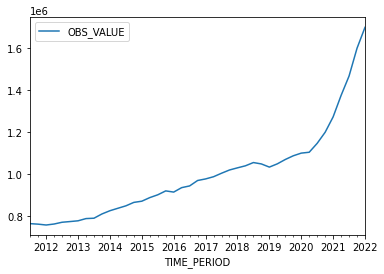

In [16]:
df3.plot()

In [18]:
df4 = df2.merge(ir_df, how='outer', on = 'TIME_PERIOD')
df4.head()

C:\Users\Duc L\.conda\envs\dev\lib\site-packages\pandas\core\frame.py:9203: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  validate=validate,


,TIME_PERIOD,"(TIME_PERIOD, )","(1, OBS_VALUE)","(2, OBS_VALUE)","(3, OBS_VALUE)","(4, OBS_VALUE)","(5, OBS_VALUE)","(6, OBS_VALUE)","(7, OBS_VALUE)","(8, OBS_VALUE)","(AUS, OBS_VALUE)",rate
0,2011-09-01,2011-09-01,1535219.2,1161369.3,765191.3,274405.0,494352.4,70315.2,38687.4,79314.2,4418854.0,4.75
1,2011-12-01,2011-12-01,1523085.2,1154289.4,762739.5,278424.3,493336.4,71619.5,35139.3,81894.6,4400528.1,4.30
2,2012-03-01,2012-03-01,1559361.3,1143877.6,758686.5,274134.8,505891.6,70580.3,34682.1,80933.4,4428147.6,4.25
3,2012-06-01,2012-06-01,1577280.7,1150030.9,763457.8,275411.8,506497.2,68526.2,34361.8,81422.5,4456988.8,3.54
4,2012-09-01,2012-09-01,1558673.2,1135768.6,771845.0,274237.4,515907.8,67711.4,35187.4,80506.8,4439837.5,3.50
